<a href="https://colab.research.google.com/github/bKostadinovic/american-british-english-translator/blob/main/fCC_cat_and_dog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = 'cats_and_dogs/test'

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [5]:
import os
import shutil

# Create a dummy directory for test images
dummy_class_dir = os.path.join(test_dir, 'unknown_class')

# If the 'unknown_class' directory doesn't exist, create it
if not os.path.exists(dummy_class_dir):
    os.makedirs(dummy_class_dir)

# Move all images in the 'test' directory into the 'unknown_class' directory
for filename in os.listdir(test_dir):
    file_path = os.path.join(test_dir, filename)
    if os.path.isfile(file_path):
        shutil.move(file_path, os.path.join(dummy_class_dir, filename))

print(f"Moved all test images to {dummy_class_dir}")

Moved all test images to cats_and_dogs/test/unknown_class


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Define directories
train_dir = 'cats_and_dogs/train'
validation_dir = 'cats_and_dogs/validation'
test_dir = 'cats_and_dogs/test'  # Make sure test images are placed in 'unknown_class' subdirectory

# Create ImageDataGenerators for the datasets
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Set up flow_from_directory for train, validation, and test data
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Since we are using binary classification (cat vs dog)
)

validation_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,  # No labels for test data
    shuffle=False  # Keep the order of images for predictions
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [23]:
import matplotlib.pyplot as plt

def plotImages(images, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(min(5, len(images))):  # Display up to 5 images
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        if predictions is not None:
            # Correct the prediction value access
            plt.title(f'{predictions[i][0]*100:.2f}%')  # Access the scalar value (probability)
        plt.axis('off')
    plt.show()


In [38]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

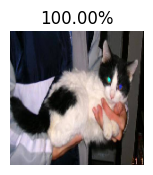

In [27]:
images = next(test_data_gen)
plotImages(images, predictions)

In [40]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=40,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)

Epoch 1/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.4920 - loss: 1.0392 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/40
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1:02 1s/step - accuracy: 0.6250 - loss: 0.6706

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6250 - loss: 0.6706 - val_accuracy: 0.4980 - val_loss: 0.6944
Epoch 3/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5326 - loss: 0.6918 - val_accuracy: 0.5927 - val_loss: 0.6692
Epoch 4/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6562 - loss: 0.6249 - val_accuracy: 0.5696 - val_loss: 0.6732
Epoch 5/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6047 - loss: 0.6627 - val_accuracy: 0.6119 - val_loss: 0.6680
Epoch 6/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5625 - loss: 0.5770 - val_accuracy: 0.5968 - val_loss: 0.6771
Epoch 7/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.6791 - loss: 0.5917 - val_accuracy: 0.6300 - val_loss: 0.6528
Epoch 8/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7188 - loss: 0.5645 - val_accuracy: 0.6058 - val_loss: 0.6613
Epoch 9/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.7276 - loss: 0.5539 - val_accuracy: 0.6200 - val_loss

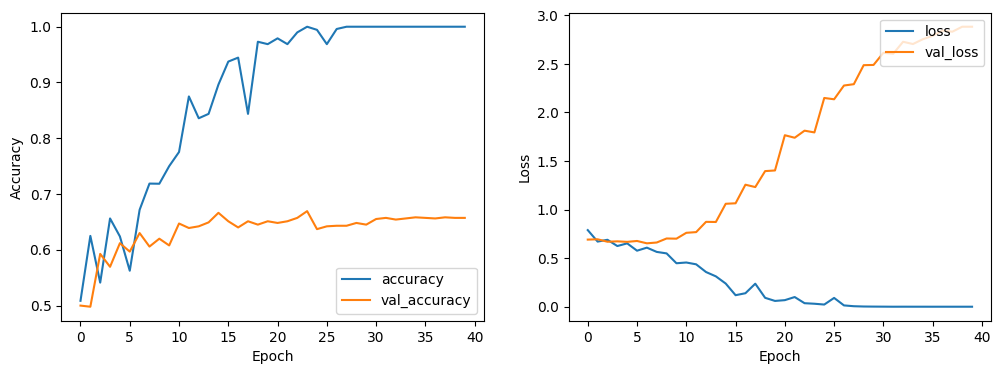

In [42]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_history(history)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


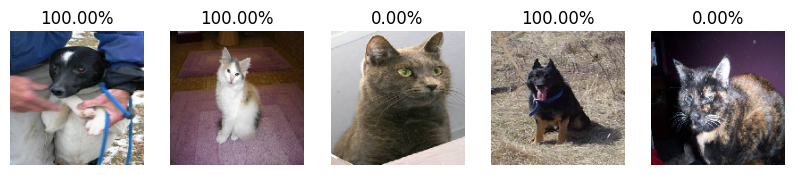

In [43]:
predictions = model.predict(test_data_gen, steps=test_data_gen.samples, verbose=1)
predictions = np.round(predictions)  # Convert probabilities to binary predictions

# Plot the test images with their predicted labels
images = [test_data_gen[i][0] for i in range(0, 5)]
plotImages(images, predictions)

In [44]:
correct = 0

for probability, answer in zip(predictions, answers):
    # Access the scalar value in the prediction array
    if round(probability[0]) == answer:
        correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
